<a href="https://colab.research.google.com/github/VictorTG25/VictoryR/blob/master/Data_Augmentation_ipynb_json_victor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Argumentation:



A common problem is the amount of data available to enter the models, for these to present the expected results it is necessary that the training occurs with a large amount of data (dataset), but in many cases there is no the data needed to perform these tasks. This is where the Data Augmentation technique comes in, which, as its name indicates, allows us to augment our dataset in two ways:# Aumentacion de Datos
Un problema habitual, es la cantidad de datos de los que se dispone para entrar los modelos, para que estos presenten los resultados esperados es necesario que el entrenamiento ocurra con una gran cantidad de datos (dataset), pero en muchas ocasiones no se dispone de los datos necesario para realizar estas tareas.
Es aquí donde entra la técnica **Data Augmentation** que, como indica su nombre, nos permite aumentar nuestro dataset de dos formas:




*   Introducing perturbations in the original data. For example: taking an original image centered, we replicate it off-center, inverting axes ...
*   Using different distributions. Example: if we want to train a model to classify high resolution images, we add low resolution images, with noise… always maintaining the highest proportion of high resolution.





At first, neural networks are not intelligent. For example, a poorly trained neural network would think that these three tennis balls shown below are distinct and unique images.



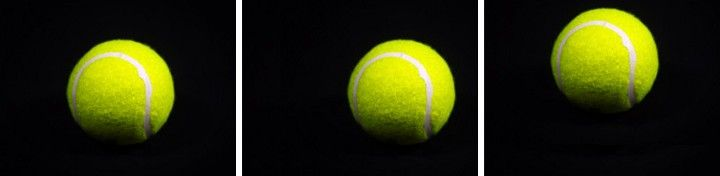



The same ball but whit some traslations.



So if we work with images, it is only necessary to make some small alterations to our dataset and we can achieve our goal.
There are many ways to augment data with images, such as:


1. Turn (Flip)
2. Rotation

1. Scale
2. Trim

1. Translation
2. Gaussian noise








The Keras library provides the ability to use data augmentation automatically when training a model.
This is accomplished by using the ImageDataGenerator class.
A variety of techniques are supported, as well as pixel scaling methods, such as:



* The changes in the image (translations) through the arguments ** width_shift_range ** and ** height_shift_range **.
* Flip the image using the ** horizontal_flip ** and ** vertical_flip ** arguments.
* Rotations of images through the argument ** rotation_range **
* Image brightness using the ** brightness_range ** argument.
* Image zoom using the ** zoom_range ** argument.

Let's independently look at examples of images after they have been magnified. It is common to use a variety of augmentation techniques at the same time during training.



In [29]:
import matplotlib.pyplot as plt    #Libreria que permite graficar, muy al estilo de MATLAB
import numpy as np                  #Libreria que permite trabajar con arreglo  
from numpy import expand_dims       #Expande la forma del arreglo 
from keras.preprocessing.image import load_img    #De la libreria de Keras para aumentacion de datos, cargamos la imagen en el formato de la libreria de imagenes de python (PIL)
from keras.preprocessing.image import img_to_array #tomará una  imagen (PIL) y la convierte en una matriz. Si parte de una imagen PNG, los valores dentro de la imagen estarán entre 0 y 255.
from keras.preprocessing.image import ImageDataGenerator #clase que toma datos originales, los transforma de forma aleatoria y devuelve solo los datos nuevos transformados
from PIL import Image #libreria de imagenes de python
from urllib.request import urlopen #Permite leer una direccion electronica


First we put an internet image

---




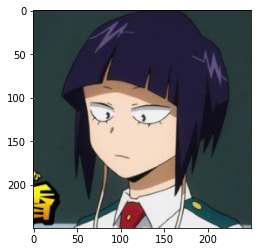

In [30]:
url = 'https://pbs.twimg.com/media/Djh7DGlW4AA2Z4K.jpg' 
filename = urlopen(url)
img = Image.open(filename)
plt.imshow(img)

Let's start with a makeover which means moving all the pixels in the image and
n one direction, such as horizontally or vertically, while maintaining the same image dimensions.

The width_shift_range and height_shift_range arguments of the ImageDataGenerator constructor control the amount of horizontal and vertical scrolling respectively.


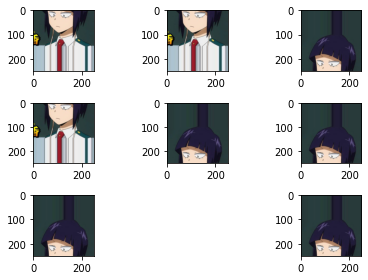

In [31]:
# Convertimos la imagen a un arreglo
data = img_to_array(img)
# realizamos una expansion a una muestra 
samples = expand_dims(data, 0)
# Creamos el aumentador de datos utilizando solo cambio de imgen 
datagen = ImageDataGenerator(height_shift_range=[-100,100])
# preparamos el iterator
it = datagen.flow(samples, batch_size=1)
# generamos muestras y mostramos los resultados
for i in range(9):
	plt.subplot(330 + 1 + i)
	# se generan lotes de imagenes
	batch = it.next()
	image = batch[0].astype('uint8') #se convierte a un valor valido para poder mostrarlo como imagen 
	plt.imshow(image)
	plt.tight_layout()
plt.show()

An image flip means to reverse the rows or columns of pixels in the case of a vertical or horizontal flip, respectively.
The magnification is specified by a Boolean argument ** horizontal_flip ** or ** vertical_flip ** for the ** ImageDataGenerator ** class.

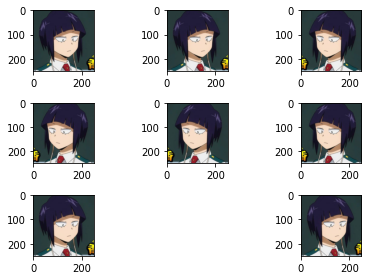

In [32]:
datagen = ImageDataGenerator(horizontal_flip=True)
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
	plt.tight_layout()
plt.show()

The amount of zoom is sampled uniformly at random from the zoom region for each dimension (width, height) separately.

Floating or [lower limit, upper limit]. Range for random zoom. If it is a float, [lower bound, upper bound] = [1-zoom_range, 1 + zoom_range]

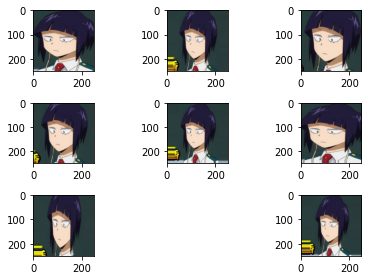

In [33]:
datagen = ImageDataGenerator(zoom_range=0.5) #float o Rango [lower,upper]
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
	plt.tight_layout()
plt.show()

The image is randomly rotated clockwise a specified number of degrees from 0 to 360. It is likely to rotate pixels outside of the image frame, leaving areas of the frame with no pixel data, which need to be filled.

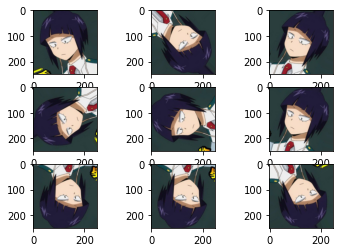

In [34]:
datagen = ImageDataGenerator(rotation_range=180)
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
plt.show()

The combination of these techniques allows us to increase the amount of data in the dataset to be used, in many jobs a data augmentation is used to increase the amount of training images and improve the precision of the job.




              featurewise_center: Boleano, poner la media de cada elemento en cero de todos los datos.
              samplewise_center**: Boleano, poener la media del cada muestra a cero
              featurewise_std_normalization: Boleano, Divida las entradas por la desviación estándar (std.) del conjunto de datos, según las características.
              samplewise_std_normalization: Boleano, divide cada dato por su std.
              zca_epsilon: El valor predeterminado es 1e-6.
              zca_whitening: Boleano, indica si se aplica el blanqueo ZCA.      

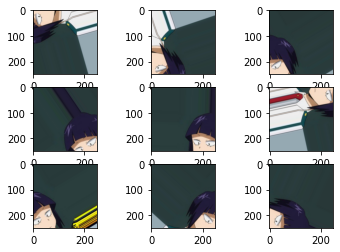

In [35]:
datagen = ImageDataGenerator(
            rotation_range               = 90,
            width_shift_range            = [100,100],   
            height_shift_range           = [100,100],   
            horizontal_flip              = True,   
            vertical_flip                = True)  
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
plt.show()

Arguments extra (ImageDataGenerator):

  **directory:** Directory where the data is located. If labels is "inferred", it should contain subdirectories, each containing images for a class. Otherwise, the directory structure is ignored.
        
  **labels:** Either "inferred" (labels are generated from the directory structure), or a list/tuple of integer labels of the same size as the number of image files found in the directory. Labels should be sorted according to the alphanumeric order of the image file paths (obtained via os.walk(directory) in Python).
  
  **label_mode:** - 'int': means that the labels are encoded as integers (e.g. for sparse_categorical_crossentropy loss). - 'categorical' means that the labels are encoded as a categorical vector (e.g. for categorical_crossentropy loss). - 'binary' means that the labels (there can be only 2) are encoded as float32 scalars with values 0 or 1 (e.g. for binary_crossentropy). - None (no labels).
      
  **class_names:**Only valid if "labels" is "inferred". This is the explict list of class names (must match names of subdirectories). Used to control the order of the classes (otherwise alphanumerical order is used).
  
  **color_mode:** One of "grayscale", "rgb", "rgba". Default: "rgb". Whether the images will be converted to have 1, 3, or 4 channels.
   
   **batch_size:** Size of the batches of data. Default: 32.
   
   **image_size:** Size to resize images to after they are read from disk. Defaults to (256, 256). Since the pipeline processes batches of images that must all have the same size, this must be provided.
   
  **shuffle:** Whether to shuffle the data. Default: True. If set to False, sorts the data in alphanumeric order.
   
   **seed:** Optional random seed for shuffling and transformations.
    
  **validation_split:** Optional float between 0 and 1, fraction of data to reserve for validation.
   
   **subset:** One of "training" or "validation". Only used if validation_split is set.
    
  **interpolation:** String, the interpolation method used when resizing images. Defaults to bilinear. Supports bilinear, nearest, bicubic, area, lanczos3, lanczos5, gaussian, mitchellcubic.
    
  **follow_links:** Whether to visits subdirectories pointed to by symlinks. Defaults to False.


Now we consider words, the necessary work is not so simple given the inherent complexity of the language (we cannot replace each word by its synonym and even if we do, we run the risk that the meaning of the sentence changes completely.
There are some libraries that can help us to carry out this task, we will start by analyzing the following:


1. Text Attack
2. Google Trans

# TextAttack
It is a Python framework for adversary attacks, adversary training, and data augmentation in NLP. We will focus only on data augmentation.

In [42]:
!pip install textattack

In [43]:
from textattack.augmentation import WordNetAugmenter, EmbeddingAugmenter, EasyDataAugmenter, CharSwapAugmenter

In [44]:
text = "Jirou best girl"

TextAttack provides us with four methods for data augmentation

.


## WordNetAugmenter
Augments the text by replacing it with synonyms from the WordNet thesaurus (thesaurus).

WordNet is a lexical database for English. Nouns, verbs, adjectives, and adverbs are grouped into sets of cognitive synonyms (synsets), each of which expresses a different concept.
WordNet superficially resembles a thesaurus in that it groups words based on their meaning.





In [54]:
aug = WordNetAugmenter();
aug.augment(text)

['Jirou best girlfriend']


## EmbeddingAugmenter
Augment text by transforming words with their inlays, with a constraint to ensure that their cosine similarity is at least 0.8.


In [55]:
aug = EmbeddingAugmenter();
aug.augment(text)

['Jirou best giri']

## CharSwapAugmenter
Augment text by substituting, deleting, inserting, and swapping adjacent characters.



In [56]:
aug = CharSwapAugmenter()
aug.augment(text)

['Jiruo best girl']


## EasyDataAugmenter


This augments the text with a combination of Wordnet synonym replacement, word deletion, word order changes, and synonym insertions. All these 4 functionalities occur randomly. So we will get different results every time we run the code. This returns 4 augmented results, unlike the other methods.


In [59]:
aug = EasyDataAugmenter()
aug.augment(text)

['Jirou girl',
 'Jirou girl best',
 'Jirou trump girl',
 'Jirou practiced best girl']

Googletrans uses the Google Translate Ajax API for language detection and translation.

The key parameters for the ** translate () ** method are:



1. ** src **: source language. this parameter is optional as ** googletrans ** will detect it.
2. ** dest **: target language. Mandatory parameter.

1. ** text **: the text to be translated from the source language to the target language. Mandatory parameter.





 



When using this method what happens is a retranslation, we go from the original language to a target language and then we return to the original, during this backtranslation, there is a slight change in the sentence between the original text and the backtranslated text, but the general meaning of prayer is still preserved. other methods.



The supported languages ​​can be consulted at https://cloud.google.com/translate/docs/languages?hl=es

To obtain the best results it is recommended to do some tests with the languages, if the target language is very similar, the translation does not lose information, however there may be the problem that the translation is too literal, this becomes a bit of a problem. try and failure.



Some lenguage examples:


*   Afrikaans 'af'

* Chinese (simplified) 'zh-CN or zh'

* Esperanto 'eo'

* Japanese 'ha'
* Latin 'la'


*   Spanish people'


* Turkmen 'tk'


* Yiddish 'yi'

* Zulu 'zu'


In [63]:
!pip install googletrans

In [65]:
from googletrans import Translator
translator = Translator()

In [68]:
origin_text = "Jirou best girl"
text_trans = translator.translate(text=origin_text, dest='ha').text
final=translator.translate(text=text_trans, dest='la').text
print(origin_text)
print(text_trans)
print(final)

Jirou best girl
J i nama fi kyau yarinya
J carne ego magis puella
